In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from lib.nb_00 import *

### test harness

A test to compare equality of two things.

In [3]:
#export
import operator 

def test(a,b, cmp, cname=None):
    if cname is None: cname = cmp.__name__
    assert cmp(a,b), f"{cname}: \n{a} \n{b}"
    
def test_eq(a,b):
    return test(a,b,operator.eq, '==')

In [4]:
TEST

'test'

In [5]:
test_eq(TEST, "test")

In [6]:
#test_eq(TEST, "test1")

### get data

In [7]:
#export
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [8]:
#export
def get_mnist(url = MNIST_URL):
    path = datasets.download_data(url, ext=".gz")
    with gzip.open(path, "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")
    return map(tensor, (x_train, y_train, x_valid, y_valid))

In [9]:
x_train, y_train, x_valid, y_valid = get_mnist()

/Users/vks/anaconda3/envs/my-fastai/lib/python3.6/site-packages/fastai/datasets.py:164: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  with open(fpath, 'r') as yaml_file: return yaml.load(yaml_file)


In [10]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

(torch.Size([50000, 784]),
 torch.Size([50000]),
 torch.Size([10000, 784]),
 torch.Size([10000]))

In [11]:
#export
mpl.rcParams['image.cmap'] = 'gray'

(<matplotlib.image.AxesImage at 0x1a28d70518>, 3)

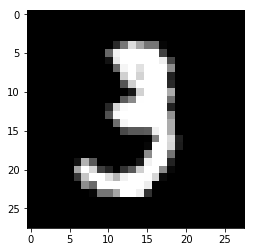

In [12]:
idx = 10
plt.imshow(x_train[idx].numpy().reshape(28,28)), y_train[idx].item()

*normalize data*

In [13]:
#export
def normalize(x, m, s):
    return (x-m)/s

In [14]:
train_mean, train_std = x_train.mean(), x_train.std()

In [15]:
train_mean

tensor(0.1304)

In [16]:
x_train = normalize(x_train, train_mean, train_std)
#normalize the validaition set with train statistics
x_valid = normalize(x_valid, train_mean, train_std)

In [17]:
x_train.mean(),x_train.std()

(tensor(-7.6999e-06), tensor(1.))

In [18]:
#export
def test_near_zero(a, rtol=1e-3): assert a.abs() < rtol, f"{a} is not Near zero"

In [19]:
test_near_zero(x_train.mean())

In [20]:
test_near_zero(1-x_train.std())

### Dataset

There is nothing special about the Dataset class, it just has to have have `__len__` and `__getitem__` functions.

In [21]:
#export
class Dataset():
    def __init__(self, x, y): self.x, self.y = x, y
    def __len__(self): return len(self.x)
    def __getitem__(self, idx): return self.x[idx], self.y[idx]

In [22]:
train_ds, valid_ds = Dataset(x_train, y_train), Dataset(x_valid, y_valid)

### DataLoaders

In [23]:
#export
from torch.utils.data import DataLoader, SequentialSampler, RandomSampler

In [24]:
#export
def get_dls(train_ds, valid_ds, bs, **kwargs):
    return (DataLoader(train_ds, batch_size=bs, shuffle=True, **kwargs),
            DataLoader(valid_ds, batch_size=bs*2, **kwargs))

In [25]:
train_dl, valid_dl = get_dls(train_ds, valid_ds, 64, num_workers=8)

In [26]:
for xb, yb in train_dl:
    print(xb.shape, yb.shape)
    break

torch.Size([64, 784]) torch.Size([64])


In [27]:
!python notebook2script.py 01_basic_data.ipynb

Converted 01_basic_data.ipynb to lib/nb_01.py
